In [1]:
from Depolarization_module import *

## A. Coherence Class

You can create a temporal coherence function instance using the class

__"_Coherence(coherence_func = 'Gaussian', **kwargs )_"__,

where in the parameter ___coherence_func___ you need to specify the kind of coherence functions you want to use for your purposes, and specify its respective key word arguments. Up to now there are 4 kinds of coherence functions, the typical ones:

1. (___coherence_func___ = 'Gaussian'): $ \gamma(x) = \exp{\left\lbrace-i\frac{2\pi}{\lambda_0}x - \frac{\pi}{2}\left( \frac{x}{l_c} \right)^2\right\rbrace} $. The kwargs you need to specify are the mean wavelenght (___wavelenght___ = $\lambda_0$) and the Gaussian coherence length (___coh_length___ = $l_c$)  

2. (___coherence_func___ = 'Lorentz'): $ \gamma(x) = \exp{\left\lbrace-i\frac{2\pi}{\lambda_0}x - \frac{|x|}{l_c} \right\rbrace} $. The kwargs you need to specify are the mean wavelenght (___wavelenght___ = $\lambda_0$) and the Lorentzian coherence length (___coh_length___ = $l_c$)

3. (___coherence_func___ = 'GaussLorentz'): $ \gamma(x) = \exp{\left\lbrace-i\frac{2\pi}{\lambda_0}x - \frac{\pi}{2}\left( \frac{x}{l_G} \right)^2 - \frac{|x|}{l_L} \right\rbrace} $. The kwargs you need to specify are the mean wavelenght (___wavelenght___ = $\lambda_0$) and the Gaussian a and Lorentzian coherence length respectivelly as a list or tuple (___coh_length___ = ($l_G$, $l_L$) )

4. (___coherence_func___ = 'Blackbody'): $ \gamma(x) = \frac{90}{\pi^4} \zeta\left( 4, 1 + i1.16\cdot 10^{-19} \frac{x}{\lambda_{max}} \right) $.  The kwargs you need to specify are the maximum wavelenght (___wavelenght___ = $\lambda_{max}$).

The $x$ variable represents the Optical Path difference suffered by a single point of the Electric field.


In [2]:
#Create a Coherence function
GaussLorentz_func = Coherence(coherence_func='GaussLorentz', coh_length = (20, 10), wavelength = 0.520)

#You can evaluate your function for a given "x"
GaussLorentz_func.eval(2)

(0.45784350779112054+0.663300833548422j)

## 1. _State_ Class

You can initialize a polarization state object using the class
 
 __"_State(alpha = 0, chi = 0, basis = (alpha_0, chi_0) )_"__, 
 
 where you need to specify the orientation angle "_alpha_"($\alpha$) and the ellipticity angle "_chi_"($\chi$) of the polarization ellipse related with the state of polarization you want to describe. Additionally you can specify the basis in which you want to express the polarization state. By defect, the basis is given in the horizontal/vertical basis, that is, basis = $(\alpha_0, \chi_0)$ THE ANGLES MUST BE GIVEN IN **DEGREES**

 <center><img src="figures/polarization_ellipse.png" alt="Graphic of the Polarization ellipse and its respective main angles; the orientation angle 'alpha' and the ellipticity angle 'chi' " style="height: 350px; width:500px;"/></center>

 The class returns the polarization state in the polarization Matrix algebraic representation

In [3]:


#Create a Right Circular State of Polarization in the horizontal basis (by default)
RC = State(0, 45,  basis = (0, 0) )
#Create a Left Circular State of Polarization in the horizontal basis (by default)
LC = State(0, -45, basis = (0, 0) )
#Create a Vertical Linear State of polarization in the horizontal basis (by default)
vertical = State(90, 0, basis = (0, 0) )
#Create a Vertical Linear State of polarization in the Circular basis
horizontal = State(90, 0, basis = (0, 45))

# TODO: Displaying the State will retrieve its representation in the quaternion formalism
print(RC, LC, vertical, horizontal)

Matrix([[1/2, -I/2], [I/2, 1/2]]) Matrix([[1/2, I/2], [-I/2, 1/2]]) Matrix([[0, 0], [0, 1]]) Matrix([[1/2, -1/2], [-1/2, 1/2]])


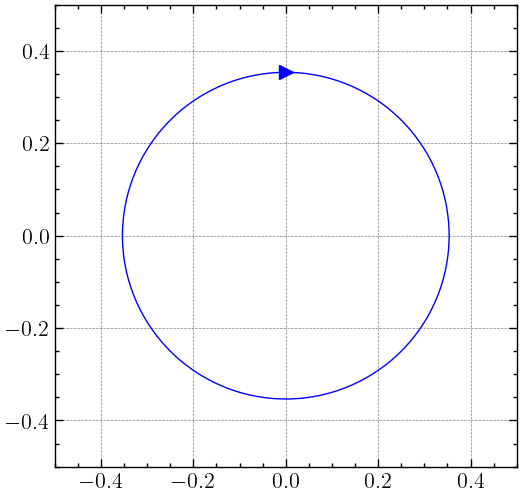

In [4]:
#You can graphic the ellipse of polarization associated with each State
RC.ellipse()

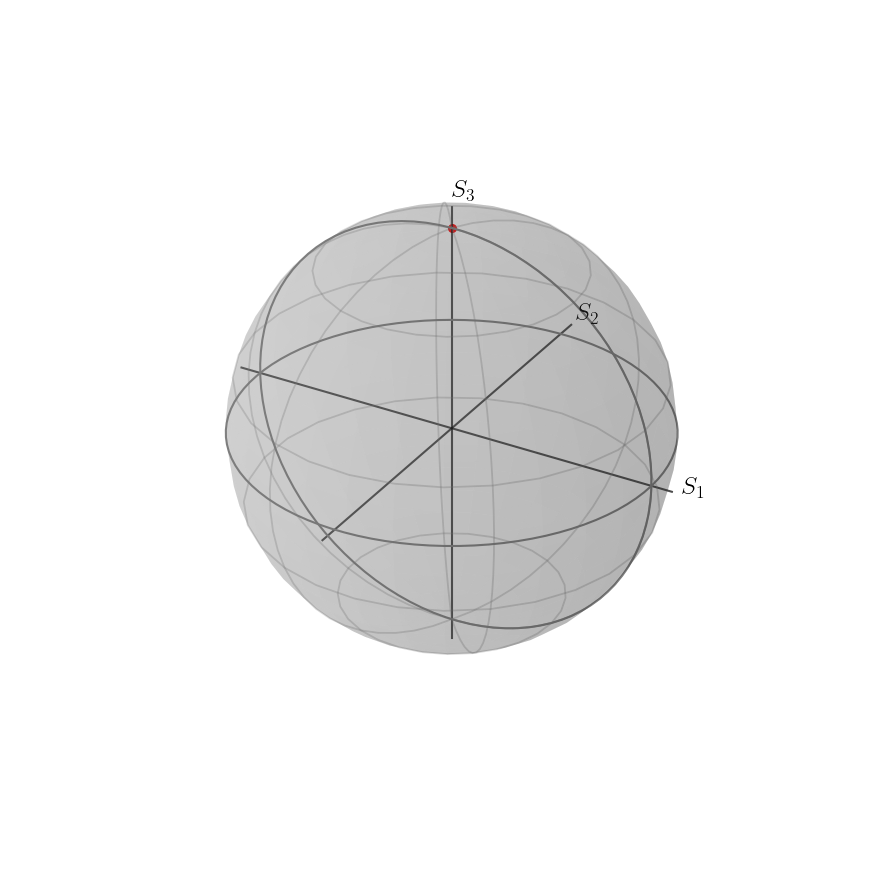

In [5]:
#you can get their associated stokes parameters
RC.stokes
#and you can graphic the polarization state representation on the Poincaré Sphere
RC.Poincare_sphere()

## 2. _Waveplate_ Class

You can initialize a Waveplate using the class

__"_Waveplate(OptPathDiff = 0, angle = 0, eigenstate = (alpha_s, chi_s), basis = (alpha_0, chi_0))_"__,

 <center><img src="figures/waveplate.png" alt="Graphic of the Polarization ellipse and its respective main angles; the orientation angle 'alpha' and the ellipticity angle 'chi' " style="height: 400px; width:400px;"/></center>

where you need to specify the Optical path difference "*OptPathDiff* $ = \Delta n l$", where $\Delta n$ is the waveplate birrefringence and $l$ its tickness. The "*angle*" parameter is the orientation $\theta$ of the waveplate's eigenmodes withrespect the horizontal axis in the laboratory frame reference. Finally, the eigenstate is a tuple/list *"(alpha_s, chi_s)"*$(\alpha_s, \chi_s)$ that defines the waveplate's eigenstates, i.e. the polarization states that remain invariant under transformations due to the waveplate operator; you only need to specify a single state determined by the angles *(alpha, chi)*$(\alpha, \chi)$ since the waveplate only have two eigenstates and they are always orthogonal. Finally, you can specify the polarization basis you want to express algebraically the waveplate operator. THE ANGLES MUST BE GIVEN IN **DEGREES**

In [6]:
 #Create an arbitraty waveplate
arbitrary_wp = Waveplate(45, 0, (0, 45)) #Waveplate with circular eigenstates
 # When displaying the Waveplate object it retrieves its operator in the jones matrix representation
arbitrary_wp

Matrix([
[   1/2 + exp(45*I)/2, I*(1 - exp(45*I))/2],
[-I*(1 - exp(45*I))/2,   1/2 + exp(45*I)/2]])

## 3. Composite Waveplate Class

A system consisting of the composition or a sequence of multiple waveplates is called a Composite Waveplate(CW). The operator of a CW system is equivalent to the operator of another waveplate with a given phase-shift and eigenstates. To initialize a CW system we use the class 

*__Composite_waveplate( waveplates )__*

where the only argument __waveplates__ must be an ordered iterable (list, array or tuple) that contains waveplate objects. The order of its elements must be the same orden as in a experimental set-up, being the first element on the list the first waveplate that interacts with light.


In [7]:
#Creating an ordered iterable containing waveplate objects:
waveplates = [Waveplate(OptPathDiff, angle) for OptPathDiff, angle in zip((20,10,80),(0,30,60))] 
#Now we create a CW object with the waveplates
cw = Composite_waveplate(waveplates)
#When displaying the CW object it retrieves its operator in the jones matrix representation as the equivalent waveplate
cw

Matrix([
[5222945*exp(30*I)/13927824 + 5222923*exp(110*I)/13927824 - 1740967*exp(100*I)/13927824 + 5222923*exp(20*I)/13927824,                                    -202/311 + 202*exp(80*I)/933 + 202*exp(10*I)/933 + 202*exp(90*I)/933],
[                                   -202*exp(20*I)/933 + 202*exp(110*I)/311 - 202*exp(100*I)/933 - 202*exp(30*I)/933, 5222923/13927824 + 5222945*exp(80*I)/13927824 - 1740967*exp(10*I)/13927824 + 5222923*exp(90*I)/13927824]])

## 4. Transformations and Depolarization in CW

Firstlly you can determine the transformation of a single State (fully polarized state) due to a single operator (waveplate) or a list of operators. You need to use the _operate_ method from State object.

**_your_state.operate( waveplate/CW or list_of waveplates/list_of_CW, Coherence )_**

which returns the transformed polarization state as a Partial_State object or a list of Partial_State objects
<center><img src="figures/operation_State.png" alt="Graphical representation of the 'operate' method " style="height: 400px; width:500px;"/></center>

In [8]:
#Create a Composite Waveplate System
waveplates = [Waveplate(10,0), Waveplate(10,30)]
CW = Composite_waveplate(waveplates)

#Now we rotate our CW system
rotating_CW = [CW.rotate(angle) for angle in range(0,180,10)]

#We create our initial state
init_state = State(0, 0)

#we define our coherence function
coherence = Coherence(coherence_func='Gaussian', coh_length = 18, wavelength = 0.633 )

#We perform the transformation
final_states = init_state.operate(rotating_CW, coherence)

#we can determine the Degree of Polarization of each final state
dops = [state.dop for state in final_states]

#and we can determine the stokes parameters of each final state
stokes = [state.stokes for state in final_states]

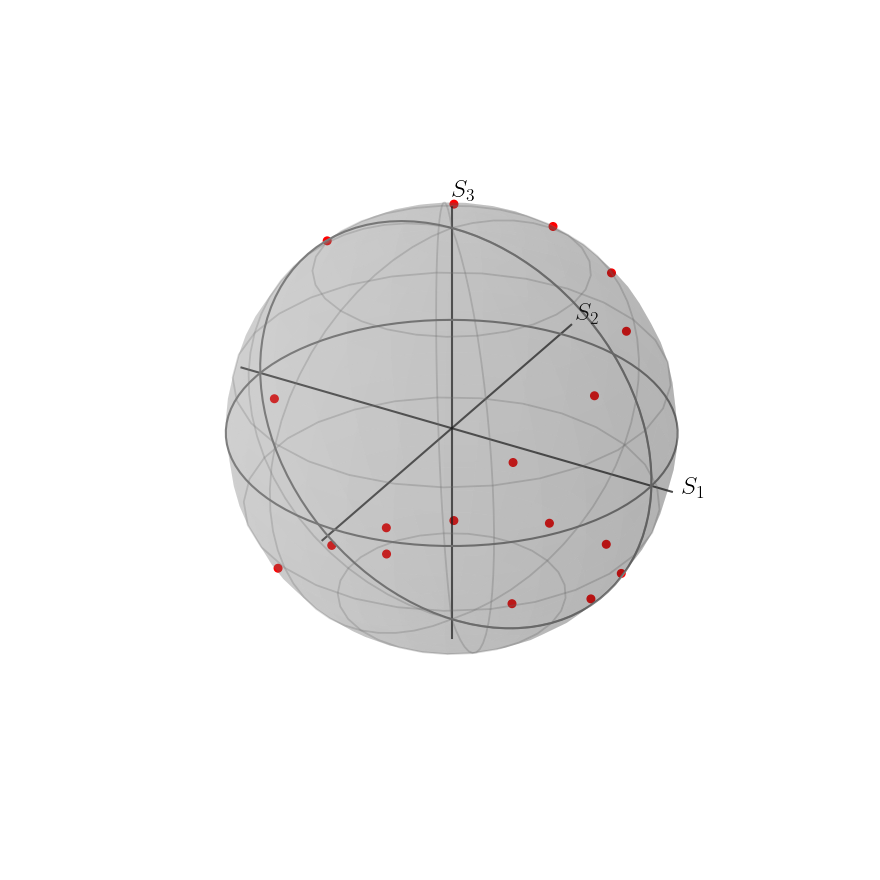

In [9]:
#We can graphic the final states
Graphic(final_states)

On the other hand, with a waveplate/CW object you can calculate the transformation of this object upon a single State object or a list/tuple of State Objects. You need to use the _operate_ method from Waveplate/CW Class

**_your_waveplate.operate( State or list_of_States )_**

which returns the transformed polarization state as a State object or a list of State objects
<center><img src="figures/operation_Waveplate.png" alt="Graphical representation of the 'operate' method " style="height: 400px; width:500px;"/></center>

In [12]:
#Creating an ordered iterable containing waveplate objects:
waveplates = [Waveplate(20, 10), Waveplate(10, 30), Waveplate(30, 40)] 
#Now we create a CW object with the waveplates
cw = Composite_waveplate(waveplates)

#we define our coherence function
coherence = Coherence(coherence_func='Gaussian', coh_length = 18, wavelength = 0.633 )

#we generate a list of initial polarization states
states = [State(0,0), State(45,0), State(0,15)]

#now we perform the transformation
final_states = cw.operate(states, coherence)

#we can obtain the degree of polarization of each final state
dop = [state.dop for state in final_states]

#we can obtain the stokes parameters of each final state
stokes = [state.stokes for state in final_states]